In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import nltk
import string
import nlp_utils
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

# **Importing Dataset**

In [3]:
df=pd.read_csv('Data/Data.csv')

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
df.isnull().sum()                      

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [7]:
df['toxic'].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [8]:
df['severe_toxic'].value_counts()

severe_toxic
0    157976
1      1595
Name: count, dtype: int64

# **Data Visualization**

In [9]:
column_value_sum = df.iloc[:,2:].sum()

In [10]:
column_value_sum

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [11]:
sort_value = column_value_sum.sort_values(ascending=False)
sort_value.index

Index(['toxic', 'obscene', 'insult', 'severe_toxic', 'identity_hate',
       'threat'],
      dtype='object')

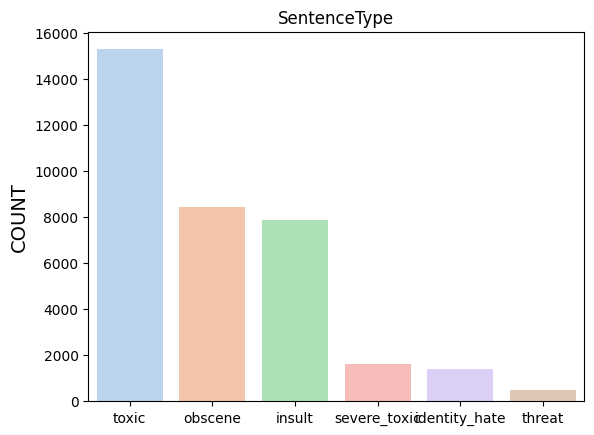

In [12]:
temp = sns.barplot(x=sort_value.index, y=sort_value.values, alpha=0.8, palette = 'pastel')
plt.title('SentenceType')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('', fontsize=15)
temp.set_xticklabels(rotation=0,labels=sort_value.index,fontsize=10)
plt.show()

# **Data Pre-processing**

In [13]:
df['comment_text'][10]

'"\nFair use rationale for Image:Wonju.jpg\n\nThanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.\n\nPlease go to the image description page and edit it to include a fair use rationale.\n\nIf you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such a

In [14]:
def clean_text(text):
    text = str(text)
    
    text = re.sub(r'\w*\d\w*', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = text.lower()
    text = re.sub("\n", " ", text)
    text = re.sub(r'[^\x00-\x7f]', ' ', text)
    
    return text.strip()

df['comment_text'] = df['comment_text'].apply(clean_text)

In [15]:
Insulting_comment_df=df.loc[:,['id','comment_text','insult']]
IdentityHate_comment_df=df.loc[:,['id','comment_text','identity_hate']]
Obscene_comment_df=df.loc[:,['id','comment_text','obscene']]
Threatening_comment_df=df.loc[:,['id','comment_text','threat']]
Severetoxic_comment_df=df.loc[:,['id','comment_text','severe_toxic']]
Toxic_comment_df=df.loc[:,['id','comment_text','toxic']]

In [16]:
Toxic_comment_df

,id,comment_text,toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on impr...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your v...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [17]:
Threatening_comment_df

,id,comment_text,threat
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on impr...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your v...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [18]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [19]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=2000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

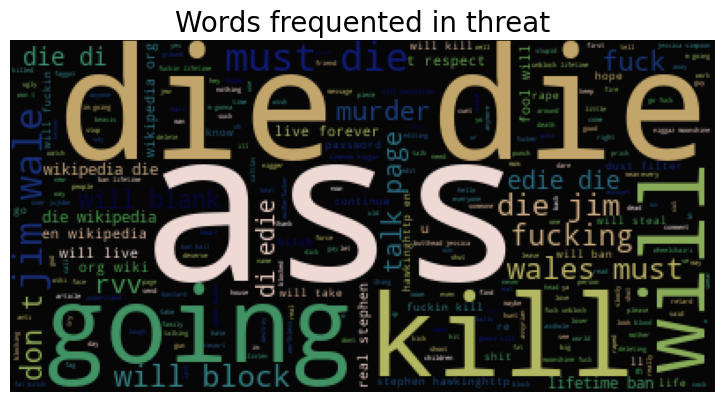

In [20]:
wordcloud(Threatening_comment_df,'threat')

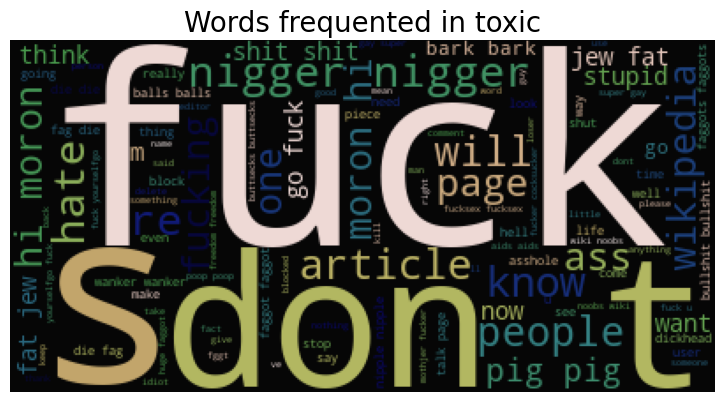

In [21]:
wordcloud(Toxic_comment_df,'toxic')

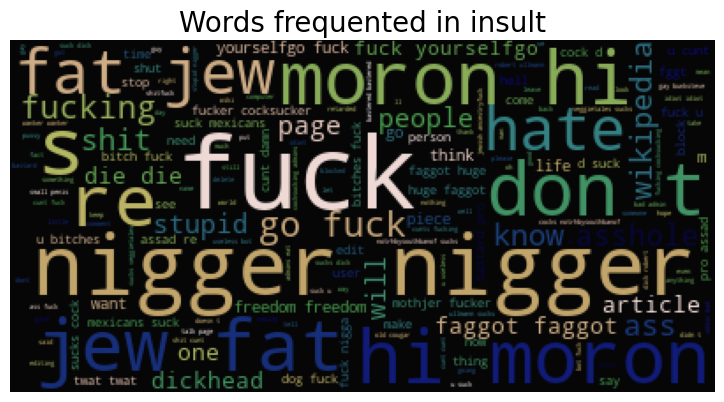

In [22]:
wordcloud(Insulting_comment_df,'insult')

# **Balancing the dataset**

## Toxic

In [23]:
Toxic_comment_balanced_1 = Toxic_comment_df[Toxic_comment_df['toxic'] == 1].iloc[0:10000,:]
Toxic_comment_balanced_0 = Toxic_comment_df[Toxic_comment_df['toxic'] == 0].iloc[0:10000,:]

In [24]:
Toxic_comment_balanced_1.shape

(10000, 3)

In [25]:
Toxic_comment_balanced_0.shape

(10000, 3)

In [26]:
Toxic_comment_balanced = pd.concat([Toxic_comment_balanced_1,Toxic_comment_balanced_0])
Toxic_comment_balanced['toxic'].value_counts()

toxic
1    10000
0    10000
Name: count, dtype: int64

## Subtoxic

In [27]:
Severetoxic_comment_df['severe_toxic'].value_counts()

severe_toxic
0    157976
1      1595
Name: count, dtype: int64

In [28]:
Severetoxic_comment_df_1 = Severetoxic_comment_df[Severetoxic_comment_df['severe_toxic'] == 1].iloc[0:1595,:]
Severetoxic_comment_df_0 = Severetoxic_comment_df[Severetoxic_comment_df['severe_toxic'] == 0].iloc[0:1595,:]

In [29]:
Severe_toxic_comment_balanced=pd.concat([Severetoxic_comment_df_1,Severetoxic_comment_df_0])
Severe_toxic_comment_balanced['severe_toxic'].value_counts() 

severe_toxic
1    1595
0    1595
Name: count, dtype: int64

## Obscene   

In [30]:
Obscene_comment_df['obscene'].value_counts()

obscene
0    151122
1      8449
Name: count, dtype: int64

In [31]:
Obscene_comment_df_1 = Obscene_comment_df[Obscene_comment_df['obscene'] == 1].iloc[0:8000,:]
Obscene_comment_df_0 = Obscene_comment_df[Obscene_comment_df['obscene'] == 0].iloc[0:8000,:]

In [32]:
Obscene_comment_balanced = pd.concat([Obscene_comment_df_1,Obscene_comment_df_0])
Obscene_comment_balanced['obscene'].value_counts()

obscene
1    8000
0    8000
Name: count, dtype: int64

## Threat

In [33]:
Threatening_comment_df['threat'].value_counts()

threat
0    159093
1       478
Name: count, dtype: int64

In [34]:
Threatening_comment_df_1 = Threatening_comment_df[Threatening_comment_df['threat'] == 1].iloc[0:478,:]
Threatening_comment_df_0 = Threatening_comment_df[Threatening_comment_df['threat'] == 0].iloc[0:478,:]

In [35]:
Threatening_comment_balanced = pd.concat([Threatening_comment_df_1,Threatening_comment_df_0])
Threatening_comment_balanced['threat'].value_counts()

threat
1    478
0    478
Name: count, dtype: int64

## Insult

In [36]:
Insulting_comment_df['insult'].value_counts()

insult
0    151694
1      7877
Name: count, dtype: int64

In [37]:
Insulting_comment_df_1 = Insulting_comment_df[Insulting_comment_df['insult'] == 1].iloc[0:7000,:]
Insulting_comment_df_0 = Insulting_comment_df[Insulting_comment_df['insult'] == 0].iloc[0:7000,:]

In [38]:
Insulting_comment_balanced = pd.concat([Insulting_comment_df_1,Insulting_comment_df_0])
Insulting_comment_balanced['insult'].value_counts()

insult
1    7000
0    7000
Name: count, dtype: int64

## Hate

In [39]:
IdentityHate_comment_df['identity_hate'].value_counts()

identity_hate
0    158166
1      1405
Name: count, dtype: int64

In [40]:
IdentityHate_comment_df_1 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 1].iloc[0:1405,:]
IdentityHate_comment_df_0 = IdentityHate_comment_df[IdentityHate_comment_df['identity_hate'] == 0].iloc[0:1405,:]

In [41]:
IdentityHate_comment_balanced = pd.concat([IdentityHate_comment_df_1,IdentityHate_comment_df_0])
IdentityHate_comment_balanced['identity_hate'].value_counts()

identity_hate
1    1405
0    1405
Name: count, dtype: int64

# **Training model**

In [42]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk import ngrams,bigrams,trigrams

In [43]:
def cv_tf_train_test(dataframe,label,vectorizer,ngram):

    X = dataframe.comment_text
    y = dataframe[label]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) 
    X_test_cv1  = cv1.transform(X_test)      
    
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=50)
    randomforest.fit(X_train_cv1, y_train)
    
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), 
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 
                     
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1

In [44]:
toxic_comment_cv = cv_tf_train_test(Toxic_comment_balanced, 'toxic', TfidfVectorizer, (1,2))
toxic_comment_cv

,F1 Score
Log Regression,0.871769
KNN,0.101951
BernoulliNB,0.731695
MultinomialNB,0.868134
SVM,0.889298
Random Forest,0.840678


In [45]:
severe_toxic_comment_cv = cv_tf_train_test(Severe_toxic_comment_balanced, 'severe_toxic', TfidfVectorizer, (1,2))
severe_toxic_comment_cv

,F1 Score
Log Regression,0.948498
KNN,0.845133
BernoulliNB,0.725292
MultinomialNB,0.941788
SVM,0.942797
Random Forest,0.947368


In [46]:
obscene_comment_cv = cv_tf_train_test(Obscene_comment_balanced, 'obscene', TfidfVectorizer, (1,2))
obscene_comment_cv

,F1 Score
Log Regression,0.915457
KNN,0.075337
BernoulliNB,0.739722
MultinomialNB,0.892412
SVM,0.928841
Random Forest,0.883813


In [47]:
threat_comment_cv = cv_tf_train_test(Threatening_comment_balanced, 'threat', TfidfVectorizer, (1,2))
threat_comment_cv

,F1 Score
Log Regression,0.925373
KNN,0.846416
BernoulliNB,0.707379
MultinomialNB,0.909091
SVM,0.902985
Random Forest,0.850498


In [48]:
insult_comment_cv = cv_tf_train_test(Insulting_comment_balanced, 'insult', TfidfVectorizer, (1,2))
insult_comment_cv

,F1 Score
Log Regression,0.899411
KNN,0.079380
BernoulliNB,0.730389
MultinomialNB,0.885133
SVM,0.910706
Random Forest,0.884806


In [49]:
identity_hatecomment_cv = cv_tf_train_test(IdentityHate_comment_balanced, 'identity_hate', TfidfVectorizer, (1,2))
identity_hatecomment_cv

,F1 Score
Log Regression,0.906173
KNN,0.815155
BernoulliNB,0.718261
MultinomialNB,0.902527
SVM,0.907767
Random Forest,0.892344


In [125]:
X = Toxic_comment_balanced['comment_text']
y = Toxic_comment_balanced['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  
X_test_fit = tfv.transform(X_test)  
toxic_classifier = RandomForestClassifier(n_estimators=100, random_state=50)

toxic_classifier.fit(X_train_fit, y_train)
toxic_classifier.predict(X_test_fit)

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

## **Testing the model**

In [137]:
comment1 = ['i killed an nigga and burn every piece of its flesh']
comment1_vect = tfv.transform(comment1)
toxic_classifier.predict_proba(comment1_vect)[:,1]

array([0.96138889])

In [127]:
comment2 = ['Is this sentence a good one']
comment2_vect = tfv.transform(comment2)
toxic_classifier.predict_proba(comment2_vect)[:,1]

array([0.08222549])

In [128]:
comment2 = ['truth will prevail']
comment2_vect = tfv.transform(comment2)
toxic_classifier.predict_proba(comment2_vect)[:,1]

array([0.38217704])

In [129]:
comment2 = ['I am going to fuck you bitch']
comment2_vect = tfv.transform(comment2)
toxic_classifier.predict_proba(comment2_vect)[:,1]

array([1.])

In [134]:
import joblib

model_file_path = r'F:\TY\Sem 2\NLP\PBL\Project 2\model.pkl'

model_data = {
    'toxic_classifier': toxic_classifier,
    'tfidf': tfv,
}

joblib.dump(model_data, model_file_path)

['F:\\TY\\Sem 2\\NLP\\PBL\\Project 2\\model.pkl']

In [135]:
model = joblib.load(model_file_path)
model.keys()

dict_keys(['toxic_classifier', 'tfidf'])